In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import nltk
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
# Assuming the file is in the current working directory, otherwise provide the full path
file_path = "zomato.csv"

# Read the CSV file into a DataFrame
zomato_df = pd.read_csv(file_path)

# Display the first 2 rows of the DataFrame
# print(zomato_df.head(2))
zomato_df.head(20)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,https://www.zomato.com/bangalore/rosewood-inte...,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
7,https://www.zomato.com/bangalore/onesta-banash...,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6/5,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,https://www.zomato.com/bangalore/penthouse-caf...,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0/5,324,+91 8884135549\r\n+91 9449449316,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,https://www.zomato.com/bangalore/smacznego-ban...,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2/5,504,+91 9945230807\r\n+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari


In [3]:
zomato_df.shape

(51717, 17)

In [4]:
zomato_df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [5]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
zomato_df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [7]:
#data cleaning and preprocessing 

In [8]:
import numpy as np

# Dropping the columns "dish liked", "phone", "url"
zomato_df = zomato_df.drop(['phone', 'dish_liked', 'url'], axis=1)

# Remove NaN values from the dataset
zomato_df.dropna(how="any", inplace=True)

# Removing duplicates and displaying the sum of duplicated rows
zomato_df.duplicated().sum()
zomato_df.drop_duplicates(inplace=True)

# Changing the column names
zomato_df = zomato_df.rename(columns={'approx_cost(for two people)': 'cost', 'listed_in(type)': 'type', 'listed_in(city)': 'city'})
print("Column names after renaming:", zomato_df.columns)

# Removing '/5' from Rates
zomato_df = zomato_df.loc[zomato_df['rate'] != 'NEW']
zomato_df = zomato_df.loc[zomato_df['rate'] != '-'].reset_index(drop=True)

remove_slash = lambda x: x.replace('/5', '') if isinstance(x, str) else x
zomato_df['rate'] = zomato_df['rate'].apply(remove_slash).str.strip().astype('float')


# Changing the 'cost' to string, replacing commas with hyphens, and converting to float
zomato_df['cost'] = zomato_df['cost'].astype(str)
zomato_df['cost'] = zomato_df['cost'].apply(lambda x: x.replace(',', '-'))

# Splitting values based on hyphen and taking the average
zomato_df['cost'] = zomato_df['cost'].apply(lambda x: np.mean(list(map(float, x.split('-')))) if '-' in x else float(x))

# Now, converting the 'cost' column to float
zomato_df['cost'] = zomato_df['cost'].astype(float)


Column names after renaming: Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')


In [9]:
zomato_df.isnull().sum()

address         0
name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
cost            0
reviews_list    0
menu_item       0
type            0
city            0
dtype: int64

In [10]:
# mean rating for each restaurant

In [11]:
# Assuming 'zomato_df' is loaded and contains the necessary columns

# Compute Mean Rating for each restaurant
from sklearn.preprocessing import MinMaxScaler


zomato_df['Mean Rating'] = zomato_df.groupby('name')['rate'].transform('mean')

# Scaling the mean rating values
scaler = MinMaxScaler(feature_range=(1, 5))
zomato_df['Mean Rating'] = scaler.fit_transform(zomato_df[['Mean Rating']]).round(2)


In [12]:
zomato_df[['name','rate','Mean Rating']].head()

,name,rate,Mean Rating
0,Jalsa,4.1,3.99
1,Spice Elephant,4.1,3.97
2,San Churro Cafe,3.8,3.58
3,Addhuri Udupi Bhojana,3.7,3.45
4,Grand Village,3.8,3.58


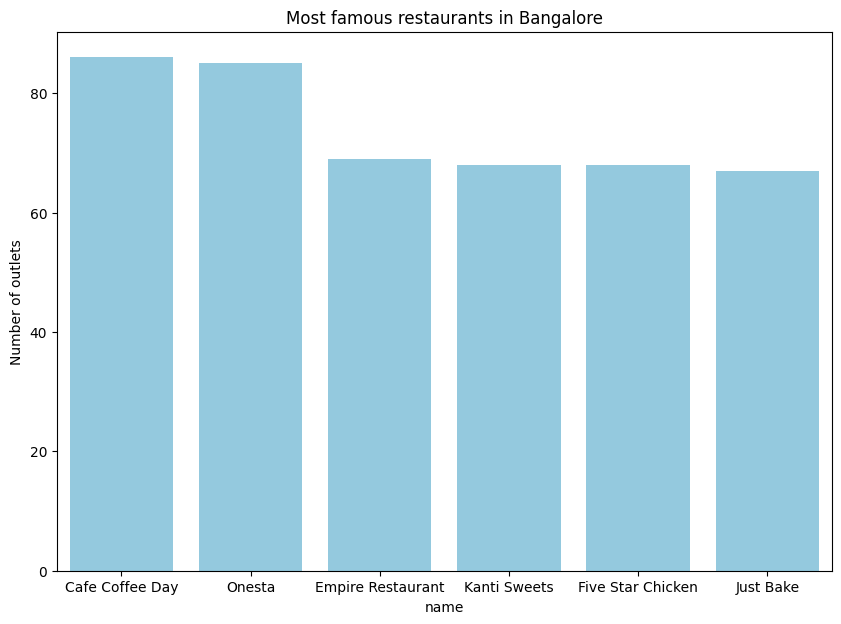

In [13]:

# Most Famous 6 restaurants in Bangalore
plt.figure(figsize=(10, 7))
chains = zomato_df['name'].value_counts()[:6]
sns.barplot(x=chains.index, y=chains, color='skyblue')  # Use 'color' instead of 'palette' without 'hue'
plt.title("Most famous restaurants in Bangalore")
plt.ylabel("Number of outlets")
plt.show()

C:\Users\SATHYA\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 131 (\x83) missing from current font.

C:\Users\SATHYA\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 130 (\x82) missing from current font.



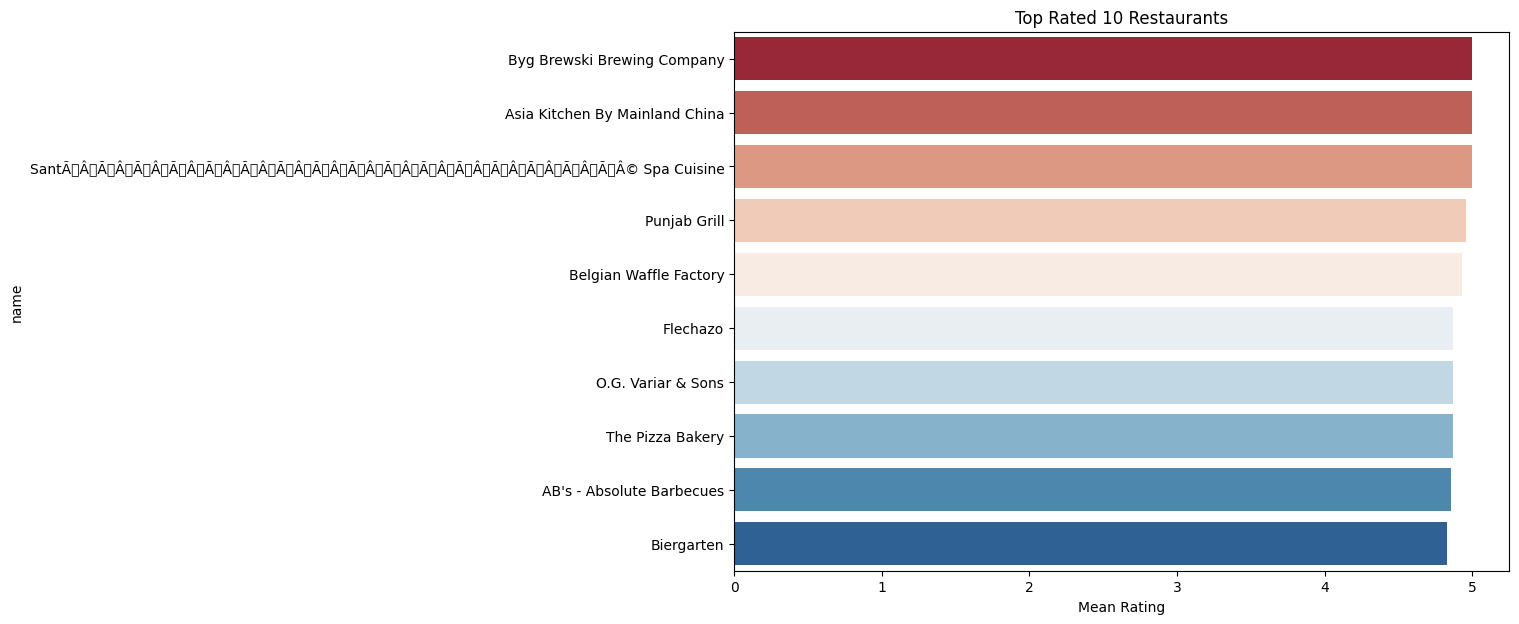

In [14]:

# Set a font that supports a wide range of glyphs
plt.rcParams['font.family'] = 'DejaVu Sans'

# Assuming you already have the 'zomato_df' DataFrame

# Top 10 Rated Restaurants
df_rating = zomato_df.drop_duplicates(subset='name')
df_rating = df_rating.sort_values(by='Mean Rating', ascending=False).head(10)

plt.figure(figsize=(10, 7))
sns.barplot(data=df_rating, x='Mean Rating', y='name', hue='name', palette='RdBu', dodge=False)
plt.title('Top Rated 10 Restaurants')
plt.show()

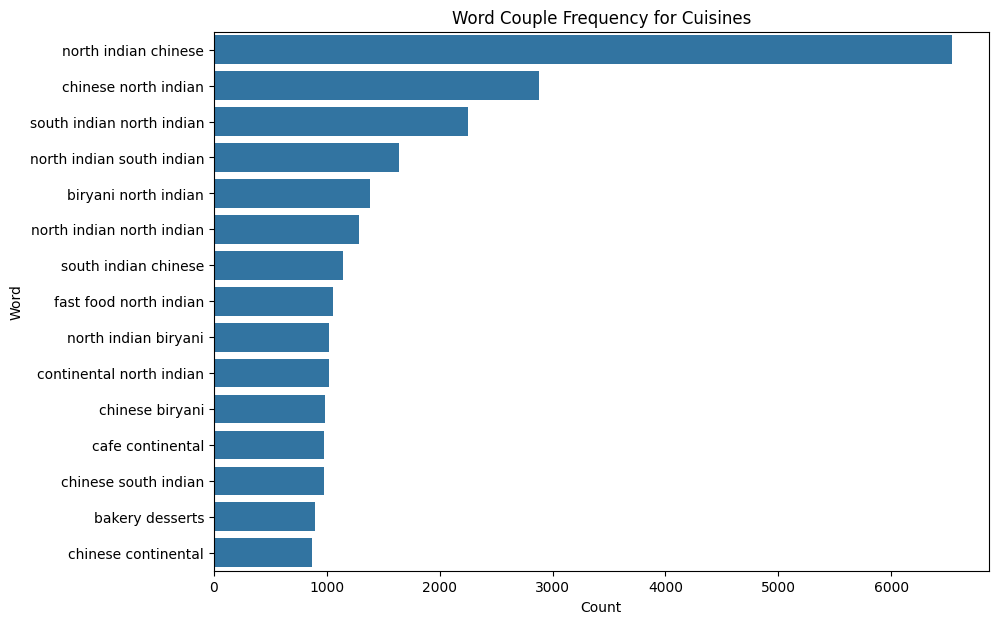

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter  # Don't forget to import Counter
# Function to get top words 



# Function to get top words
def get_top_words(data, n, ngram_range):
    words = [word for line in data for word in line.lower().split(', ')]
    ngrams = [tuple(words[i:i+ngram_range[1]]) for i in range(len(words)-ngram_range[1]+1)]
    return Counter(ngrams).most_common(n)

# Top 15 two-word frequencies for Cuisines
lst = get_top_words(zomato_df['cuisines'], 15, (2, 2))
df_words = pd.DataFrame(lst, columns=['Word', 'Count'])

# Convert 'Word' column to a list
df_words['Word'] = df_words['Word'].apply(lambda x: ' '.join(x))

# Plotting
plt.figure(figsize=(10, 7))
sns.barplot(data=df_words, x='Count', y='Word')
plt.title('Word Couple Frequency for Cuisines')
plt.show()

In [16]:
# zomato_df.head(5)
# zomato_df.columns
subset_df = zomato_df.head(15000)


In [17]:
print(subset_df['reviews_list'].isnull().sum())


0


In [18]:
subset_df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city', 'Mean Rating'],
      dtype='object')

In [19]:
# Assuming zomato_df is your DataFrame
subset_df.set_index('name', inplace=True)
indices = pd.Series(subset_df.index)
print(subset_df)
print(indices)


                                                                   address  \
name                                                                         
Jalsa                    942, 21st Main Road, 2nd Stage, Banashankari, ...   
Spice Elephant           2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
San Churro Cafe          1112, Next to KIMS Medical College, 17th Cross...   
Addhuri Udupi Bhojana    1st Floor, Annakuteera, 3rd Stage, Banashankar...   
Grand Village            10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   
...                                                                    ...   
The Biryanis             39, Opposite IBP Petrol Pump, Jeevan Bhima Nag...   
Delicacy                 M 22, 10th Main, 1st Floor, Jeevan Bhima Nagar...   
Bekal                    38, 1st Floor, Opposite Indian Oil Petrol Pump...   
D'Cafe                   295, Opposite Suvitas Hospital, Ring Road, Kri...   
Gurukrupa Paratha House  15, 1st Main, Near Shubham traders , Do

In [20]:
# Creating tf-idf matrix
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0.1, stop_words="english",max_features=1000)
print(tfidf)

TfidfVectorizer(max_features=1000, min_df=0.1, ngram_range=(1, 2),
                stop_words='english')


In [21]:
tfidf_matrix = tfidf.fit_transform(subset_df['reviews_list'])


# tfidf_matrix = tfidf.fit_transform(zomato_df['reviews_list'])
print(tfidf_matrix)

  (0, 336)	0.09226399363834444
  (0, 303)	0.03437477931847989
  (0, 446)	0.0346271370781927
  (0, 469)	0.0377754596604868
  (0, 146)	0.04426342795440401
  (0, 159)	0.04299353290647776
  (0, 332)	0.03185435351271321
  (0, 343)	0.03048364716692531
  (0, 169)	0.0430235329146373
  (0, 333)	0.03889566345848173
  (0, 56)	0.042704372075941965
  (0, 468)	0.037264808669110125
  (0, 467)	0.0906803563902627
  (0, 466)	0.1813607127805254
  (0, 471)	0.18137867986468384
  (0, 472)	0.0906803563902627
  (0, 193)	0.04082636662885178
  (0, 330)	0.03645482960737253
  (0, 340)	0.03826816163885171
  (0, 370)	0.03749001578439911
  (0, 164)	0.03747488809039284
  (0, 10)	0.04111138353317065
  (0, 337)	0.171234522661595
  (0, 222)	0.11895786256131047
  (0, 290)	0.2616370377714626
  :	:
  (14999, 302)	0.12697677221528458
  (14999, 107)	0.26231049832352676
  (14999, 28)	0.10877387277153397
  (14999, 478)	0.10504959495905072
  (14999, 323)	0.08659710098207843
  (14999, 202)	0.10831908252018463
  (14999, 337)	0.09

In [22]:
import pickle

from sklearn.metrics.pairwise import cosine_similarity
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(cosine_similarities)
with open('cosine_similarities.pkl', 'wb') as file:
    pickle.dump(cosine_similarities, file)

[[1.         0.51039674 0.58153166 ... 0.64507369 0.31827739 0.20459788]
 [0.51039674 1.         0.56411973 ... 0.42814118 0.35333006 0.26572651]
 [0.58153166 0.56411973 1.         ... 0.50301553 0.35622912 0.23239688]
 ...
 [0.64507369 0.42814118 0.50301553 ... 1.         0.24457108 0.31530805]
 [0.31827739 0.35333006 0.35622912 ... 0.24457108 1.         0.15564356]
 [0.20459788 0.26572651 0.23239688 ... 0.31530805 0.15564356 1.        ]]


In [23]:
# Creating tf-idf matrix
# tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0.1, stop_words="english")
# tfidf_matrix = tfidf.fit_transform(zomato_df['reviews_list'])
# cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)
# print(cosine_similarities)

In [28]:
def recommend(name, cosine_similarities, indices, subset_df):
    # Check if the name is in the DataFrame
    if name not in subset_df.index:
        print(f"Restaurant '{name}' not found in the dataset.")
        return None  # You can choose to return something else or handle it as needed
    
    # Create a list to put top restaurants
    recommend_restaurant = []
    
    # Find the index of the restaurant entered
    idx = subset_df.index.get_loc(name)
    
    # Find the restaurants with a similar cosine-sim value and order them from biggest to smallest
    score_series = cosine_similarities[idx]
    
    # Extract top 10 restaurant indexes with a similar cosine-sim value
    top10_indexes = np.argsort(score_series)[::-1][1:11]  # Starting from 1 to exclude the entered restaurant itself and taking only the top 10
    
    # Names of the top 10 restaurants
    for each in top10_indexes:
        recommend_restaurant.append(indices[each])
    
    # Creating the new data set to show similar restaurants
    df_new = pd.DataFrame(columns=['cuisines', 'Mean Rating', 'cost'])
    
    # Create the top 10 similar restaurants with some of their columns
    for each in recommend_restaurant:
        df_new = pd.concat([df_new, subset_df[['cuisines', 'Mean Rating', 'cost']].loc[each]])
    
    # Drop the same-named restaurants and sort only the top 10 by the highest rating
    df_new = df_new.drop_duplicates(subset=['cuisines', 'Mean Rating', 'cost'], keep=False)
    df_new = df_new.sort_values(by='Mean Rating', ascending=False).head(10)
    
    print(f'TOP {len(df_new)} RESTAURANTS LIKE {name} WITH SIMILAR REVIEWS:')
    
    return df_new

# Example usage
result = recommend('Addhuri Udupi Bhojana', cosine_similarities, indices, subset_df)

# Check if the result is None before further processing
if result is not None:
    print(result)
else:
    print("Handle the case when the restaurant is not found.")


TOP 10 RESTAURANTS LIKE Addhuri Udupi Bhojana WITH SIMILAR REVIEWS:
                                                                                 cuisines  \
Punjab Grill                                                                 North Indian   
ECHOES Koramangala                      Chinese, American, Continental, Italian, North...   
You Mee                                                    Sushi, Japanese, Chinese, Thai   
Taaza Thindi                                                                 South Indian   
Toit                                                             Italian, American, Pizza   
Big Pitcher                             American, Continental, North Indian, Mediterra...   
Vanilla Sky                               Chinese, Continental, North Indian, Finger Food   
Kurtoskalacs                                                          Desserts, Fast Food   
Brew and Barbeque - A Microbrewery Pub              Continental, North Indian, BBQ, Steak   
Do

C:\Users\SATHYA\AppData\Local\Temp\ipykernel_14372\1318810609.py:28: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



In [30]:
recommend('Toit', cosine_similarities, indices, subset_df)


TOP 0 RESTAURANTS LIKE Toit WITH SIMILAR REVIEWS:


C:\Users\SATHYA\AppData\Local\Temp\ipykernel_14372\1318810609.py:28: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



,cuisines,Mean Rating,cost


In [32]:
def precision_at_k(actual, predicted, k):
    # Get the top K predicted items
    top_k_predictions = predicted[:k]
    
    # Calculate precision
    precision = sum(item in actual for item in top_k_predictions) / k
    return precision


In [33]:
 
restaurant_name = 'Addhuri Udupi Bhojana'

# Filter the dataset for the specified restaurant name
selected_restaurant = zomato_df[zomato_df['name'] == restaurant_name]

# Check if the restaurant was found in the dataset
if not selected_restaurant.empty:
    # Extract the rating for the specified restaurant
    restaurant_rating = selected_restaurant['rate'].values[0]
    print(f"The rating for '{restaurant_name}' is: {restaurant_rating}")
else:
    print(f"Restaurant '{restaurant_name}' not found in the dataset.")


The rating for 'Addhuri Udupi Bhojana' is: 3.7


In [42]:
# Assuming restaurant_rating is a single rating value, not a list or array
restaurant_rating = 4.5  # Replace with the actual rating

# Convert the predicted_items to a list if it's not already
predicted_items = [result['Mean Rating']] if isinstance(result['Mean Rating'], (float, np.float64)) else result['Mean Rating'].tolist()

k_value = 5

print(f'Actual Rating: {restaurant_rating}')
print(f'Predicted Ratings: {predicted_items}')

precision_at_5 = precision_at_k([restaurant_rating], predicted_items, k_value)
print(f'Precision at {k_value}: {precision_at_5}')
k_value = 10
precision_at_10 = precision_at_k([restaurant_rating], predicted_items, k_value)
print(f'Precision at {k_value}: {precision_at_10}')


Actual Rating: 4.5
Predicted Ratings: [4.96, 4.74, 4.74, 4.74, 4.74, 4.68, 4.68, 4.64, 4.64, 4.61]
Precision at 5: 0.0
Precision at 10: 0.0


In [46]:
print(cosine_similarities)

[[1.         0.51039674 0.58153166 ... 0.64507369 0.31827739 0.20459788]
 [0.51039674 1.         0.56411973 ... 0.42814118 0.35333006 0.26572651]
 [0.58153166 0.56411973 1.         ... 0.50301553 0.35622912 0.23239688]
 ...
 [0.64507369 0.42814118 0.50301553 ... 1.         0.24457108 0.31530805]
 [0.31827739 0.35333006 0.35622912 ... 0.24457108 1.         0.15564356]
 [0.20459788 0.26572651 0.23239688 ... 0.31530805 0.15564356 1.        ]]


In [50]:
print(tfidf_matrix)

  (0, 336)	0.09226399363834444
  (0, 303)	0.03437477931847989
  (0, 446)	0.0346271370781927
  (0, 469)	0.0377754596604868
  (0, 146)	0.04426342795440401
  (0, 159)	0.04299353290647776
  (0, 332)	0.03185435351271321
  (0, 343)	0.03048364716692531
  (0, 169)	0.0430235329146373
  (0, 333)	0.03889566345848173
  (0, 56)	0.042704372075941965
  (0, 468)	0.037264808669110125
  (0, 467)	0.0906803563902627
  (0, 466)	0.1813607127805254
  (0, 471)	0.18137867986468384
  (0, 472)	0.0906803563902627
  (0, 193)	0.04082636662885178
  (0, 330)	0.03645482960737253
  (0, 340)	0.03826816163885171
  (0, 370)	0.03749001578439911
  (0, 164)	0.03747488809039284
  (0, 10)	0.04111138353317065
  (0, 337)	0.171234522661595
  (0, 222)	0.11895786256131047
  (0, 290)	0.2616370377714626
  :	:
  (14999, 302)	0.12697677221528458
  (14999, 107)	0.26231049832352676
  (14999, 28)	0.10877387277153397
  (14999, 478)	0.10504959495905072
  (14999, 323)	0.08659710098207843
  (14999, 202)	0.10831908252018463
  (14999, 337)	0.09